In [ ]:
# # if you do not have the folder to begin with:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd content/drive/MyDrive
!git clone https://github.com/MadBeignet/MadBeignet.github.io

Cloning into 'MadBeignet.github.io'...
remote: Enumerating objects: 210, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 210 (delta 48), reused 66 (delta 23), pack-reused 108
Receiving objects: 100% (210/210), 15.68 MiB | 24.01 MiB/s, done.
Resolving deltas: 100% (70/70), done.


In [ ]:
#%cd../../../

In [ ]:
# # first, mount your google drive, change to the course folder, pull latest changes, and change to the lab folder.
# from google.colab import drive
# drive.mount('/content/drive',force_remount=True)
#%cd content/MadBeignet.github.io
# !git pull
# %cd Data

In [ ]:
%cd MadBeignet.github.io

/content/MadBeignet.github.io


In [ ]:
!ls

Data	   index.html
index.css  Political_Resistance_and_Participation_in_the_US.ipynb


In [ ]:
%cd './Data'

/content/MadBeignet.github.io/Data


In [ ]:
# imports
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from matplotlib.pyplot import figure
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from numpy.core.getlimits import inf


Team: Merrilee Montgomery and Maddie Wisinski


Website Link: https://madbeignet.github.io/

<h1>Project Goals</h1>
<p>The team will be looking at the relationship between political participation and political resistance in the United States from 2000-2021 by state.</p> <p>To measure political participation, the team will use voter turnout statistics by state from collected by the Election Project. The election project website derives all its data from individual state websites.</p><p>This project will distinguish between violent and nonviolent political resistance. To measure nonviolent political resistance, this group will use protest frequency and size from Count Love, a group from MIT that began tracking protests amidst the 2017 Women's March. To study violent political resistance, this project will use Profiles of Individual Radicalization in the US (PIRUS) from University of Maryland National Consortium for the Study of Terrorism and Responses to Terrorism (START). The PIRUS Dataset contains informaiton about individuals who's radicalization became apparent through their plotting to engage in violent activity.</p>

Election Project: https://www.electproject.org/home

Count Love: https://countlove.org/faq.html

PIRUS: https://www.start.umd.edu/data-tools/profiles-individual-radicalization-united-states-pirus


<h1>Voter Turnout: 2000-2022</h1>

<h2>Cleaning the Data</h2><p>The Election Project collects voter turnout data for the general election that occur every two comes in separate CSVs by year. Here we want to read all by-year files into a single DataFrame. To do so, we must account for the following:</p> 

1.   Years 2000-2010 are in a uniform format, but missing state abbreviation.
2.   Years 2012-2020 have an extra column of state abreviation that can be used to create a index value consisting of Year and State Abbreviation.
3.   Years 2016-2020 have notes at the end of each csv that must be deleted.

<h4>Step 1: Concatenate years 2000-2010</h4>

In [ ]:
csv_final = pd.read_csv("./Voter_Turnouts/2000 November General Election - Turnout Rates.csv",
                        header = None,
                        skiprows = 2)#first two rows is header in CSV
csv_final['Year']=2000

l = []#we will use this to make sure all files loaded
for a in range (2002,2012,2):
  csv_temp = pd.read_csv("./Voter_Turnouts/"+str(a)+" November General Election - Turnout Rates.csv",
                         header = None,
                         skiprows = 2)#first two rows are headers in csv
  csv_temp['Year']=a#As year is incremented,value changes
  l.append(1)
  csv_final = pd.concat([csv_final,csv_temp],ignore_index = True)
final_df = pd.DataFrame(csv_final)
print(len(l) == 5)#Test to make sure all files were uploaded, returns true if successful, false else
final_df.columns = ['Region', 'VEP Total Ballots Counted', 'VEP Highest Office', 'VAP Highest Office', 'Total Ballots Counted', 'Highest Office', 'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)', '% Non-citizen', 'Prison', 'Probation', 'Parole', 'Total Ineligible Felon', 'Overseas Eligible', 'Year']
#Rename all columns

final_df

True


,Region,VEP Total Ballots Counted,VEP Highest Office,VAP Highest Office,Total Ballots Counted,Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,Year
0,United States,55.3%,54.2%,50.0%,"107,390,107","105,375,486","194,331,436","210,623,408",7.7%,"1,377,013","2,339,388","536,039","3,082,746","2,937,000",2000
1,Alabama,NaN,51.6%,50.1%,NaN,"1,672,551","3,241,682","3,334,576",1.5%,"26,225","40,178","5,484","51,798",NaN,2000
2,Alaska,68.7%,68.1%,65.0%,"287,825","285,560","419,111","440,296",3.4%,"4,173","4,779",525,"7,088",NaN,2000
3,Arizona,46.4%,45.6%,40.2%,"1,559,520","1,532,016","3,357,701","3,816,498",10.3%,"26,510","59,810","3,474","59,889",NaN,2000
4,Arkansas,NaN,47.9%,46.0%,NaN,"921,781","1,925,961","2,001,774",2.3%,"11,915","28,409","8,659","34,779",NaN,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,Virginia,39.1%,38.7%,35.4%,"2,214,505","2,189,841","5,660,589","6,194,717",7.1%,"36,020","56,654","2,624","95,376",NaN,2010
308,Washington,54.3%,53.2%,48.4%,"2,565,589","2,511,094","4,724,350","5,190,736",8.3%,"17,331","15,452","6,956","37,165",NaN,2010
309,West Virginia,37.2%,36.8%,36.1%,"536,493","529,948","1,442,003","1,468,812",0.9%,"6,673","6,650","1,796","14,229",NaN,2010
310,Wisconsin,52.4%,52.0%,49.7%,"2,185,021","2,171,331","4,172,130","4,365,214",3.2%,"22,724","22,602","19,572","55,112",NaN,2010


<h4>Step 2: Drop State Abbreviations and Excess Rows</h4>


<p>To concatenate Voter Turnout from years 2012-2022, we have to remove the abbreviation column and any excess rows (which are usually methodology notes.)</p>

In [ ]:
l = []#we will use this to make sure all files loaded
for a in range (2012,2016,2):
  csv_temp = pd.read_csv("./Voter_Turnouts/"+str(a)+" November General Election - Turnout Rates.csv",
                         header = None,
                         skiprows = 2,
                         names = ['Region', 'VEP Total Ballots Counted', 'VEP Highest Office', 'VAP Highest Office', 'Total Ballots Counted', 'Highest Office', 'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)', '% Non-citizen', 'Prison', 'Probation', 'Parole', 'Total Ineligible Felon', 'Overseas Eligible', 'State Abv'])#first two rows are headers in csv
  csv_temp['Year']=a#As year is incremented,value changes
  csv_temp = csv_temp.iloc[:52]
  csv_temp.drop('State Abv',inplace=True,axis=1)
  csv_final = pd.concat([csv_final,csv_temp],ignore_index=True)#not sure whats going wrong now, I'll ask Dr. Culotta

csv_final

,Region,VEP Total Ballots Counted,VEP Highest Office,VAP Highest Office,Total Ballots Counted,Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,Year
0,United States,55.3%,54.2%,50.0%,"107,390,107","105,375,486","194,331,436","210,623,408",7.7%,"1,377,013","2,339,388","536,039","3,082,746","2,937,000",2000
1,Alabama,NaN,51.6%,50.1%,NaN,"1,672,551","3,241,682","3,334,576",1.5%,"26,225","40,178","5,484","51,798",NaN,2000
2,Alaska,68.7%,68.1%,65.0%,"287,825","285,560","419,111","440,296",3.4%,"4,173","4,779",525,"7,088",NaN,2000
3,Arizona,46.4%,45.6%,40.2%,"1,559,520","1,532,016","3,357,701","3,816,498",10.3%,"26,510","59,810","3,474","59,889",NaN,2000
4,Arkansas,NaN,47.9%,46.0%,NaN,"921,781","1,925,961","2,001,774",2.3%,"11,915","28,409","8,659","34,779",NaN,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,Virginia,36.8%,36.6%,33.7%,"2,194,346","2,184,473","5,962,456","6,467,462",6.9%,"36,943","54,966","1,732","69,456",NaN,2014
412,Washington,43.1%,41.2%,37.1%,"2,124,330","2,029,189","4,928,407","5,479,396",8.4%,"17,345","94,112","9,880","79,928",NaN,2014
413,West Virginia,32.0%,31.2%,30.7%,"462,864","451,498","1,447,652","1,465,232",0.9%,"6,873","7,174","2,749","13,639",NaN,2014
414,Wisconsin,56.9%,56.6%,53.9%,"2,422,248","2,410,314","4,260,427","4,454,970",3.1%,"22,097","46,212","20,010","67,986",NaN,2014


<p>After 2014, Voter Turnout Data Column names and values vary more. As a result, we must clean each individual dataset to concatenate</p>
<p></p>
<h4>2018</h4>

In [ ]:
temp_18 = pd.read_csv("./Voter_Turnouts/2018 November General Election - Turnout Rates.csv",
                      names =['Region', 'Estimated or Actual 2018 Total Ballots Counted VEP Turnout Rate', '2018 Vote for Highest Office VEP Turnout Rate', 'Status', 'Source', 'Estimated or Actual 2018 Total Ballots Counted', '2018 Vote for Highest Office', 'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)', '% Non-citizen', 'Prison', 'Probation', 'Parole', 'Total Ineligible Felon', 'Overseas Eligible', 'State Abv'],
                      skiprows=2,
                      header = None)
temp_18.drop('Source',inplace=True,axis=1)
temp_18.drop('Status',inplace=True,axis=1)
temp_18.drop('State Abv',inplace=True,axis=1)
csv_final.drop('VAP Highest Office',inplace=True,axis=1)
csv_final.columns
temp_18.columns = ['Region', 'VEP Total Ballots Counted', 'VEP Highest Office',
       'Total Ballots Counted', 'Highest Office',
       'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)',
       '% Non-citizen', 'Prison', 'Probation', 'Parole',
       'Total Ineligible Felon', 'Overseas Eligible']
temp_18['Year']=2018
temp_18 = temp_18.iloc[:52]
csv_final = pd.concat([csv_final,temp_18],ignore_index = True)
csv_final


,Region,VEP Total Ballots Counted,VEP Highest Office,Total Ballots Counted,Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,Year
0,United States,55.3%,54.2%,"107,390,107","105,375,486","194,331,436","210,623,408",7.7%,"1,377,013","2,339,388","536,039","3,082,746","2,937,000",2000
1,Alabama,NaN,51.6%,NaN,"1,672,551","3,241,682","3,334,576",1.5%,"26,225","40,178","5,484","51,798",NaN,2000
2,Alaska,68.7%,68.1%,"287,825","285,560","419,111","440,296",3.4%,"4,173","4,779",525,"7,088",NaN,2000
3,Arizona,46.4%,45.6%,"1,559,520","1,532,016","3,357,701","3,816,498",10.3%,"26,510","59,810","3,474","59,889",NaN,2000
4,Arkansas,NaN,47.9%,NaN,"921,781","1,925,961","2,001,774",2.3%,"11,915","28,409","8,659","34,779",NaN,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,Virginia,54.4%,54.3%,"3,363,505","3,351,373","6,177,626","6,687,863",6.5%,"36,959","60,821","1,650","73,277",NaN,2018
464,Washington,58.3%,57.4%,"3,133,448","3,086,168","5,373,202","5,981,386",8.8%,"18,335","89,317","11,322","80,568",NaN,2018
465,West Virginia,42.5%,41.7%,"597,149","586,034","1,404,206","1,429,959",0.8%,"7,137","6,523","3,550","14,405",NaN,2018
466,Wisconsin,61.4%,61.4%,"2,675,000","2,673,308","4,354,527","4,563,564",3.1%,"22,889","44,489","20,401","68,649",NaN,2018


In [ ]:
l = 'Region,Source,Status,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate (Total Ballots Counted),VEP Turnout Rate (Highest Office),Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv'
lis = l.split(',')
print(lis)


['Region', 'Source', 'Status', 'Total Ballots Counted (Estimate)', 'Vote for Highest Office (President)', 'VEP Turnout Rate (Total Ballots Counted)', 'VEP Turnout Rate (Highest Office)', 'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)', '% Non-citizen', 'Prison', 'Probation', 'Parole', 'Total Ineligible Felon', 'Overseas Eligible', 'State Abv']


<h4>2016</h4>

In [ ]:
temp_16 = pd.read_csv("./Voter_Turnouts/2016 November General Election - Turnout Rates.csv",
                      names =['Region', 'State Results Website', 'Status', 'VEP Total Ballots Counted', 'VEP Highest Office', 'VAP Highest Office', 'Total Ballots Counted (Estimate)', 'Highest Office', 'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)', '% Non-citizen', 'Prison', 'Probation', 'Parole', 'Total Ineligible Felon', 'Overseas Eligible', 'State Abv'],
                      skiprows=2,
                      header = None)
temp_16.drop('Status',inplace=True,axis=1)
temp_16.drop('State Results Website',inplace=True,axis=1)
temp_16.drop('State Abv',inplace=True,axis=1)
temp_16.drop('VAP Highest Office',inplace=True,axis=1)
temp_16['Year']=2016
temp_16.columns = csv_final.columns
temp_16 = temp_16.iloc[:52]
csv_final = pd.concat([csv_final,temp_16],ignore_index = True)
csv_final


,Region,VEP Total Ballots Counted,VEP Highest Office,Total Ballots Counted,Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,Year
0,United States,55.3%,54.2%,"107,390,107","105,375,486","194,331,436","210,623,408",7.7%,"1,377,013","2,339,388","536,039","3,082,746","2,937,000",2000
1,Alabama,NaN,51.6%,NaN,"1,672,551","3,241,682","3,334,576",1.5%,"26,225","40,178","5,484","51,798",NaN,2000
2,Alaska,68.7%,68.1%,"287,825","285,560","419,111","440,296",3.4%,"4,173","4,779",525,"7,088",NaN,2000
3,Arizona,46.4%,45.6%,"1,559,520","1,532,016","3,357,701","3,816,498",10.3%,"26,510","59,810","3,474","59,889",NaN,2000
4,Arkansas,NaN,47.9%,NaN,"921,781","1,925,961","2,001,774",2.3%,"11,915","28,409","8,659","34,779",NaN,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Virginia,NaN,66.1%,NaN,"3,984,631","6,027,152","6,551,390",6.9%,"36,959","60,821","1,650","73,277",NaN,2016
516,Washington,65.7%,64.7%,"3,363,440","3,317,019","5,123,020","5,691,833",8.6%,"18,335","89,317","11,322","80,568",NaN,2016
517,West Virginia,NaN,50.2%,NaN,"714,423","1,423,031","1,453,201",1.1%,"7,137","6,523","3,550","14,405",NaN,2016
518,Wisconsin,NaN,69.5%,NaN,"2,976,150","4,285,071","4,495,783",3.2%,"22,889","44,489","20,401","68,649",NaN,2016


<h4>2020</h4>

In [ ]:
temp_20 = pd.read_csv("./Voter_Turnouts/2020 November General Election - Turnout Rates.csv",
                      names =['Region', 'Source', 'Status', 'Total Ballots Counted (Estimate)', 'Vote for Highest Office (President)', 'VEP Turnout Rate (Total Ballots Counted)', 'VEP Turnout Rate (Highest Office)', 'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)', '% Non-citizen', 'Prison', 'Probation', 'Parole', 'Total Ineligible Felon', 'Overseas Eligible', 'State Abv'],
                      skiprows=2,
                      header = None)
temp_20.drop('Source',inplace=True,axis=1)
temp_20.drop('Status',inplace=True,axis=1)
temp_20.drop('State Abv',inplace=True,axis=1)
temp_20 = temp_20[['Region','VEP Turnout Rate (Total Ballots Counted)','VEP Turnout Rate (Highest Office)','Total Ballots Counted (Estimate)', 'Vote for Highest Office (President)', 'Voting-Eligible Population (VEP)', 'Voting-Age Population (VAP)', '% Non-citizen', 'Prison', 'Probation', 'Parole', 'Total Ineligible Felon', 'Overseas Eligible']]
temp_20['Year'] = 2020
temp_20.columns = csv_final.columns
temp_20 = temp_20.iloc[:52]
csv_final = pd.concat([csv_final,temp_20],ignore_index = True)
csv_final

,Region,VEP Total Ballots Counted,VEP Highest Office,Total Ballots Counted,Highest Office,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,Year
0,United States,55.3%,54.2%,"107,390,107","105,375,486","194,331,436","210,623,408",7.7%,"1,377,013","2,339,388","536,039","3,082,746","2,937,000",2000
1,Alabama,NaN,51.6%,NaN,"1,672,551","3,241,682","3,334,576",1.5%,"26,225","40,178","5,484","51,798",NaN,2000
2,Alaska,68.7%,68.1%,"287,825","285,560","419,111","440,296",3.4%,"4,173","4,779",525,"7,088",NaN,2000
3,Arizona,46.4%,45.6%,"1,559,520","1,532,016","3,357,701","3,816,498",10.3%,"26,510","59,810","3,474","59,889",NaN,2000
4,Arkansas,NaN,47.9%,NaN,"921,781","1,925,961","2,001,774",2.3%,"11,915","28,409","8,659","34,779",NaN,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Virginia,73.0%,72.0%,"4,523,142","4,460,524","6,196,071","6,727,440",6.8%,"35,743","63,111","1,860","76,732",NaN,2020
568,Washington,75.7%,75.2%,"4,116,894","4,087,631","5,437,844","6,070,046",9.1%,"18,777","76,672","12,222","78,536",NaN,2020
569,West Virginia,57.6%,57.0%,"802,726","794,652","1,394,028","1,422,098",0.9%,"6,757","6,593","4,287","15,132",NaN,2020
570,Wisconsin,75.8%,75.5%,"3,310,000","3,298,041","4,368,530","4,586,746",3.2%,"23,574","42,909","21,015","71,193",NaN,2020


In [ ]:
states_cleaned = []
for e in csv_final.Region:
    e = str(e).replace('*','')
    states_cleaned.append(e)
csv_final.Region = states_cleaned

pd.unique(csv_final.Region)

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

<h2>Radicalized Individuals in the United States</h2><p>This data set is collected on the individual level. Because we are examining trends on the state level, we will save this Data grouped to the individuals' origin states.</p>

<h4>1. Loading the PIRUS Data</h4><p>The PIRUS data measures 145 categorical and quantitative variables that do not load nicely into COLAB. We have taken the first header line from the CSV an split it into a list that can be passed as column names for the CSV.</p>

In [ ]:
a = "Subject_ID,Loc_Plot_State1,Loc_Plot_City1,Loc_Plot_State2,Loc_Plot_City2,Date_Exposure,Plot_Target1,Plot_Target2,Plot_Target3,Attack_Preparation,Op_Security,Changing_Target,Anticp_Fatals_Targ,Internet_Use_Plot,Extent_Plot,Violent,Criminal_Severity,Criminal_Charges,Indict_Arrest,Current_Status,Group_Membership,Terrorist_Group_Name1,Terrorist_Group_Name2,Terrorist_Group_Name3,Actively_Recruited,Recruiter1,Recruiter2,Recruiter3,Actively_Connect,Group_Competition,Role_Group,Length_Group,Clique,Clique_Radicalize,Clique_Connect,Internet_Radicalization,Media_Radicalization,Social_Media,Social_Media_Frequency,Social_Media_Platform1,Social_Media_Platform2,Social_Media_Platform3,Social_Media_Platform4,Social_Media_Platform5,Social_Media_Activities1,Social_Media_Activities2,Social_Media_Activities3,Social_Media_Activities4,Social_Media_Activities5,Social_Media_Activities6,Social_Media_Activities7,Radicalization_Islamist,Radicalization_Far_Right,Radicalization_Far_Left,Radicalization_Single_Issue,Ideological_Sub_Category1,Ideological_Sub_Category2,Ideological_Sub_Category3,Loc_Habitation_State1,Loc_Habitation_City1,Loc_Habitation_State2,Loc_Habitation_City2,Itinerant,External_Rad,Rad_duration,Radical_Behaviors,Radical_Beliefs,US_Govt_Leader,Foreign_Govt_Leader,Event_Influence1,Event_Influence2,Event_Influence3,Event_Influence4,Beliefs_Trajectory,Behaviors_Trajectory,Radicalization_Sequence,Radicalization_Place,Prison_Radicalize,Broad_Ethnicity,Age,Marital_Status,Children,Age_Child,Gender,Religious_Background,Convert,Convert_Date,Reawakening,Reawakening_Date,Citizenship,Residency_Status,Nativity,Time_US_Months,Immigrant_Generation,Immigrant_Source,Language_English,Diaspora_Ties,Education,Student,Education_Change,Employment_Status,Change_Performance,Work_History,Military,Foreign_Military,Social_Stratum_Childhood,Social_Stratum_Adulthood,Aspirations,Abuse_Child,Abuse_Adult,Abuse_type1,Abuse_Type2,Abuse_Type3,Psychological,Alcohol_Drug,Absent_Parent,Overseas_Family,Close_Family,Family_Religiosity,Family_Ideology,Family_Ideological_Level,Prison_Family_Friend,Crime_Family_Friend,Radical_Friend,Radical_Family,Radical_Signif_Other,Relationship_Troubles,Platonic_Troubles,Unstructured_Time,Friendship_Source1,Friendship_Source2,Friendship_Source3,Kicked_Out,Previous_Criminal_Activity,Previous_Criminal_Activity_Type1,Previous_Criminal_Activity_Type2,Previous_Criminal_Activity_Type3,Previous_Criminal_Activity_Age,Gang,Gang_Age_Joined,Trauma,Other_Ideologies,Angry_US,Group_Grievance,Standing"
def listify(mis_string):
  return mis_string.split(",")
pirus_headlist = listify(a)
print(pirus_headlist)

['Subject_ID', 'Loc_Plot_State1', 'Loc_Plot_City1', 'Loc_Plot_State2', 'Loc_Plot_City2', 'Date_Exposure', 'Plot_Target1', 'Plot_Target2', 'Plot_Target3', 'Attack_Preparation', 'Op_Security', 'Changing_Target', 'Anticp_Fatals_Targ', 'Internet_Use_Plot', 'Extent_Plot', 'Violent', 'Criminal_Severity', 'Criminal_Charges', 'Indict_Arrest', 'Current_Status', 'Group_Membership', 'Terrorist_Group_Name1', 'Terrorist_Group_Name2', 'Terrorist_Group_Name3', 'Actively_Recruited', 'Recruiter1', 'Recruiter2', 'Recruiter3', 'Actively_Connect', 'Group_Competition', 'Role_Group', 'Length_Group', 'Clique', 'Clique_Radicalize', 'Clique_Connect', 'Internet_Radicalization', 'Media_Radicalization', 'Social_Media', 'Social_Media_Frequency', 'Social_Media_Platform1', 'Social_Media_Platform2', 'Social_Media_Platform3', 'Social_Media_Platform4', 'Social_Media_Platform5', 'Social_Media_Activities1', 'Social_Media_Activities2', 'Social_Media_Activities3', 'Social_Media_Activities4', 'Social_Media_Activities5', 'So

In [ ]:
pirus_temp = pd.read_csv("./PIRUS_May2020/PIRUS_Public_May2020.csv",
                         header=1,
                         names = pirus_headlist)
pirus_temp

,Subject_ID,Loc_Plot_State1,Loc_Plot_City1,Loc_Plot_State2,Loc_Plot_City2,Date_Exposure,Plot_Target1,Plot_Target2,Plot_Target3,Attack_Preparation,...,Previous_Criminal_Activity_Type2,Previous_Criminal_Activity_Type3,Previous_Criminal_Activity_Age,Gang,Gang_Age_Joined,Trauma,Other_Ideologies,Angry_US,Group_Grievance,Standing
0,4857,New York,-99,NaN,NaN,1/1/49,-88,NaN,NaN,-88,...,NaN,NaN,-99,0,-88,3,0,1,-99,-99
1,5803,Alabama,Birmingham,NaN,NaN,1/1/49,-88,NaN,NaN,-88,...,NaN,NaN,-88,0,-88,-99,0,-99,2,-99
2,4796,District of Columbia,Washington,NaN,NaN,11/1/50,-88,NaN,NaN,-88,...,NaN,NaN,-88,0,-88,-99,0,1,2,-99
3,4840,District of Columbia,Washington,NaN,NaN,11/1/50,14,NaN,NaN,1,...,NaN,NaN,-99,0,-88,-99,0,1,-99,-99
4,4841,District of Columbia,Washington,NaN,NaN,11/1/50,2,NaN,NaN,1,...,NaN,NaN,-99,0,-88,-99,0,1,3,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,7817,Florida,Tallahassee,NaN,NaN,11/3/18,14,NaN,NaN,1,...,NaN,NaN,-88,0,-88,1,0,0,3,1
2221,7828,South Carolina,Columbia,NaN,NaN,11/12/18,-88,NaN,NaN,-88,...,NaN,NaN,-99,0,-88,-99,0,-99,-99,-99
2222,7825,District of Columbia,Washington,NaN,NaN,11/13/18,-88,NaN,NaN,-88,...,NaN,NaN,2,0,-88,1,0,0,3,0
2223,1374,California,Los Angeles,NaN,NaN,11/26/18,14,NaN,NaN,1,...,NaN,NaN,-99,0,-88,-99,0,-99,-99,-99


<h4>2. Filtering and Grouping By States</h2><p> We will only examine radicalized individual since 2000 due to the fact that voter data comes from the 2000-2020 years, and protest data comes from the 2017-2021 years. (This data starts in 1948 and goes through 2018.)

We will also use value_counts to determine the different states that from which the radicalized individual originate from. We are assuming that this is also the state in which the individual is mostly likely to engage in popular protest and vote.</p>

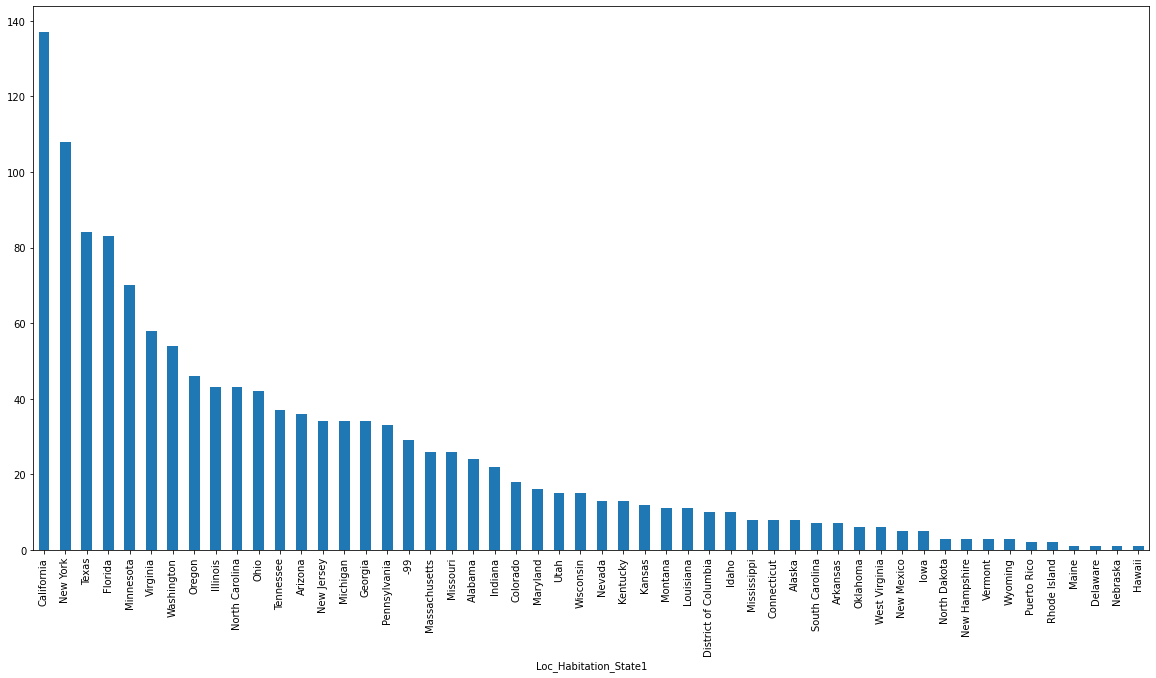

In [ ]:
#Date_Exposure is not comparable because it is of dtype string.
#Create column 'Year' of int values that represents the last 2 digit of the year.
l = []
for val in pirus_temp['Date_Exposure']:
  a = val.split('/')
  b = a[-1:]
  l.append(int(b[0]))
pirus_temp['Year'] = l
#Any row with 'Year' under 22 occured in the 2000's and is in the scope of this study
pirus_temp = pirus_temp[pirus_temp['Year'] <= 22]
#Group by state
pirus_states_since_2000 = pirus_temp.value_counts('Loc_Habitation_State1')
pirus_states_since_2000.plot(kind='bar', figsize=(20, 10))

<h2>Protests in the United States</h2><p>This data set is collected on the event level. Because we are examining trends on the state level, we will save this Data grouped to the protest event location. It is worth noting that popular protest often spreads. This data is harvested by webcrawling for news articles and similar media referencing the protest to a location. Therefore, protests that happened in wave, such as those in response to George Floyd's murder, will appearch multiple times. However, we will still count these as separate events, even if such events are comorbid.</p><p>Because this data set only covers 4 years, we do not have to filter it. We will only group it by state.</p>

In [ ]:
protests_temp = pd.read_csv("./Protests/data.csv",
                         header = 1,
                         names = ['Date','Location','Attendees',
                         'Event (legacy; see tags)','Tags',
                         'Curated','Source','Total_Articles'])
protests_temp.head(20)

,Date,Location,Attendees,Event (legacy; see tags),Tags,Curated,Source,Total_Articles
0,2017-01-16,"Johnson City, TN",300.0,Civil Rights,Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.johnsoncitypress.com/Local/2017/01/...,4
1,2017-01-16,"Indianapolis, IN",20.0,Environment,Environment; For wilderness preservation,Yes,http://wishtv.com/2017/01/16/nature-groups-pro...,1
2,2017-01-16,"Cincinnati, OH",NaN,Other (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.cincinnati.com/picture-gallery/news...,1
3,2017-01-18,"Hartford, CT",300.0,Healthcare (Pro-Planned Parenthood),Healthcare; For Planned Parenthood,Yes,http://www.realhartford.org/2017/01/19/reprodu...,1
4,2017-01-19,"Washington, DC",NaN,Executive,Executive; Against 45th president,Yes,https://malvern-online.com/content/melee-near-...,1
5,2017-01-19,"Washington, DC",NaN,Executive,Executive; For 45th president; Counter protest,No,https://malvern-online.com/content/melee-near-...,1
6,2017-01-20,"University of Washington, Seattle, WA",NaN,Racial Injustice,Civil Rights; For racial justice; Against invi...,Yes,http://komonews.com/news/local/woman-says-she-...,2
7,2017-01-20,"Westlake Park, Seattle, WA",100.0,Executive,Executive; Against 45th president,Yes,https://www.seattletimes.com/seattle-news/nort...,1
8,2017-01-20,"Columbus, OH",2450.0,Civil Rights (Women's March),Civil Rights; For women's rights; Women's March,Yes,http://www.cleveland.com/politics/index.ssf/20...,1
9,2017-01-20,"Anacortes, WA",1200.0,Civil Rights (Women's March),Civil Rights; For women's rights; Women's March,Yes,http://www.goskagit.com/skagit/hundreds-partic...,1


In [ ]:
#Must create state attribute to groupby state, similar to extracting year, but first create dictionary matching statges to abbreviation.
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado","Connecticut","District of Columbia","Delaware","Florida","Georgia","Guam","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Puerto Rico","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","United States","Utah", "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
abbrev = ["AL","AK","AZ","AR","CA","CO","CT","DC","DE","FL","GA","GU","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","PR","RI","SC","SD","TN","TX","US","UT","VT","VA","WA","WV","WI","WY"]
states_dict = {}
i = 0
for name in abbrev:
  states_dict[name] = states[i]
  i += 1
print(states_dict)
#create list of state names
protests_temp


{'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DC': 'District of Columbia', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'GU': 'Guam', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'PR': 'Puerto Rico', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'US': 'United States', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 

,Date,Location,Attendees,Event (legacy; see tags),Tags,Curated,Source,Total_Articles
0,2017-01-16,"Johnson City, TN",300.0,Civil Rights,Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.johnsoncitypress.com/Local/2017/01/...,4
1,2017-01-16,"Indianapolis, IN",20.0,Environment,Environment; For wilderness preservation,Yes,http://wishtv.com/2017/01/16/nature-groups-pro...,1
2,2017-01-16,"Cincinnati, OH",NaN,Other (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.cincinnati.com/picture-gallery/news...,1
3,2017-01-18,"Hartford, CT",300.0,Healthcare (Pro-Planned Parenthood),Healthcare; For Planned Parenthood,Yes,http://www.realhartford.org/2017/01/19/reprodu...,1
4,2017-01-19,"Washington, DC",NaN,Executive,Executive; Against 45th president,Yes,https://malvern-online.com/content/melee-near-...,1
...,...,...,...,...,...,...,...,...
38091,2021-01-30,"Washington Square, Ottawa, IL",100.0,Legislative,Legislative; Against congressional representat...,No,https://www.shawlocal.com/mywebtimes/news/loca...,1
38092,2021-01-31,"Topeka, KS",NaN,Civil Rights,Civil Rights; For abortion rights,Yes,https://www.kake.com/story/43266152/kansans-ra...,2
38093,2021-01-31,"Austin, TX",20.0,Other,Other; Against homeless residents,No,https://www.kxan.com/news/local/save-our-commu...,1
38094,2021-01-31,"Salt Lake City, UT",NaN,Other,Other; Against deregulation; Business,No,https://www.abc4.com/news/local-news/crowds-ga...,1


In [ ]:
#Create a list that can be added as a column to the DataFrame, representing the locatiion the protest took place in.
l = []
for val in protests_temp['Location']:
  m = val.split(',')
  if len(m) >= 2:
    n = m[-1][-2:]
    state = states_dict[n.upper()]
    l.append(state)
  else: #accounting for abnormal cases. implementation based on printing individual cases
    if m == 'La Porte County Courthouse in La Porte':
      l.append('Indiana')
    if m == 'Space':
      l.append('New York')
    if n == 'WA':
      l.append('Washington')
    if n == 'DE':
      l.append('Delaware')
protests_temp['State'] = l
#protests_temp

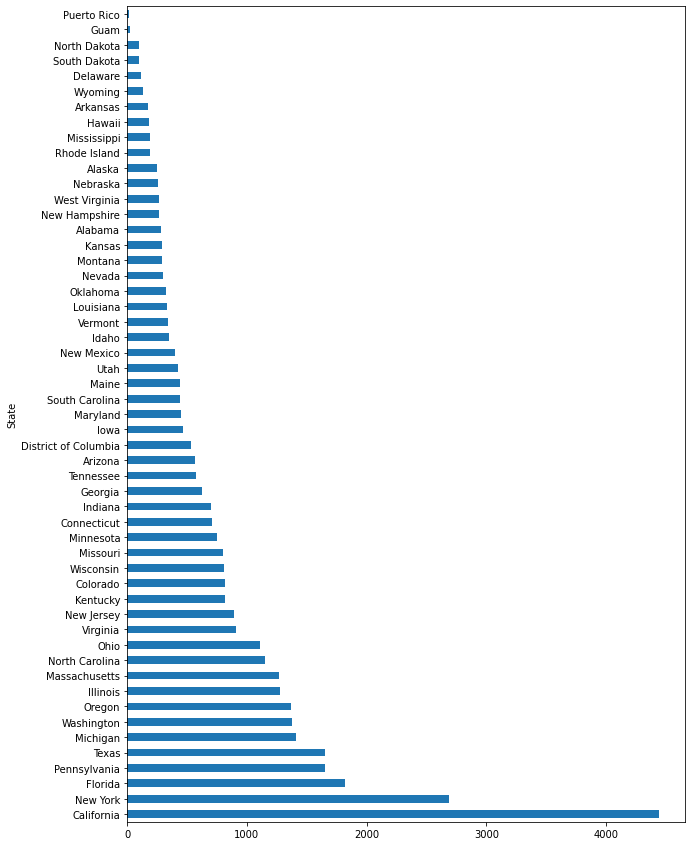

In [ ]:
protests_by_state = protests_temp.value_counts('State')
protests_by_state.plot.barh(figsize=(10,15))

<p>From this bar chart, we can see that California has the highest number of protests. California also had the highest number of radicalized individuals.</p>

In [ ]:
protests_by_state.mean()

718.7924528301887

We can also see that the mean number of protests by state is 718. 

<h1>Population Data</h1>
Source: Census Bureau. 
Notes: The years 2020 and 2021 were in different files, so had to join them.

In [ ]:
pop20_21 = pd.read_csv('./Population/2020-2021 Census Bureau Population.csv')
#Rename columns due to header reading error
pop20_21.rename(columns={'Population Estimate\n (as of July 1)':'2020','Unnamed: 3':'2021'},inplace=True)
#Drop the first 6 rows becausethey are aggregates
pop20_21 = pop20_21.iloc[6:]
list1 = []
for i in pop20_21['Geographic Area']:
  i = i[1:]
  list1.append(i)
pop20_21['Geographic Area'] = list1
pop20_21.head()

,Geographic Area,"April 1, 2020 Estimates Base",2020,2021
6,Alabama,5024279.0,5024803.0,5039877.0
7,Alaska,733391.0,732441.0,732673.0
8,Arizona,7151502.0,7177986.0,7276316.0
9,Arkansas,3011524.0,3012232.0,3025891.0
10,California,39538223.0,39499738.0,39237836.0


In [ ]:
pop10_19 = pd.read_csv('./Population/nst-est2019-01.csv')
#Rename columns due to header reading error
pop10_19.rename(columns={'Population Estimate (as of July 1)':'2010','Unnamed: 2':'Estimates Base','Unnamed: 4':'2011','Unnamed: 5':'2012','Unnamed: 5':'2012','Unnamed: 6':'2013','Unnamed: 7':'2014','Unnamed: 8':'2015','Unnamed: 9':'2016','Unnamed: 10':'2017','Unnamed: 11':'2018','Unnamed: 12': '2019'},inplace=True)
#Drop the first 6 rows becausethey are aggregates
pop10_19 = pop10_19.iloc[6:]
list1 = []
for i in pop10_19['Geographic Area']:
  i = i[1:]
  list1.append(i)
pop10_19['Geographic Area'] = list1
pop10_19.head()

,Geographic Area,"April 1, 2010",Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
6,Alabama,4779736.00,4780125.00,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
7,Alaska,710231.00,710249.00,713910.0,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
8,Arizona,6392017.00,6392288.00,6407172.0,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
9,Arkansas,2915918.00,2916031.00,2921964.0,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
10,California,37253956.00,37254519.00,37319502.0,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0


In [ ]:
total_population = pop10_19
total_population['2020'] = pop20_21['2020']
total_population['2021'] = pop20_21['2021']
total_population.drop(['April 1, 2010','Estimates Base'],inplace=True,axis=1)

In [ ]:
total_population.columns

Index(['Geographic Area', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [ ]:
def df_creation(row):
  ret_val = pd.DataFrame()
  ret_val['Population'] = list(row)[1:]
  ret_val['Year'] = total_population.columns[1:]
  return ret_val

S_pop = {}
for index, row in total_population.iterrows():
  S_pop[list(row)[0]] = df_creation(row)


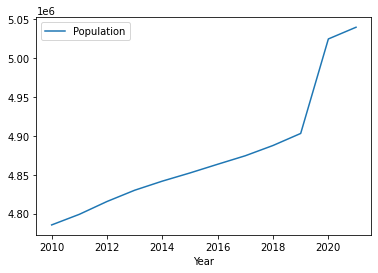

In [ ]:
ax=S_pop['Alabama'].plot(x='Year',y='Population')

In [ ]:
total_population

,Geographic Area,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
6,Alabama,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0,5024803.0,5039877.0
7,Alaska,713910.0,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0,732441.0,732673.0
8,Arizona,6407172.0,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0,7177986.0,7276316.0
9,Arkansas,2921964.0,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0,3012232.0,3025891.0
10,California,37319502.0,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0,39499738.0,39237836.0
11,Colorado,5047349.0,5121108.0,5192647.0,5269035.0,5350101.0,5450623.0,5539215.0,5611885.0,5691287.0,5758736.0,5784308.0,5812069.0
12,Connecticut,3579114.0,3588283.0,3594547.0,3594841.0,3594524.0,3587122.0,3578141.0,3573297.0,3571520.0,3565287.0,3600260.0,3605597.0
13,Delaware,899593.0,907381.0,915179.0,923576.0,932487.0,941252.0,948921.0,956823.0,965479.0,973764.0,991886.0,1003384.0
14,District of Columbia,605226.0,619800.0,634924.0,650581.0,662328.0,675400.0,685815.0,694906.0,701547.0,705749.0,690093.0,670050.0
15,Florida,18845537.0,19053237.0,19297822.0,19545621.0,19845911.0,20209042.0,20613477.0,20963613.0,21244317.0,21477737.0,21569932.0,21781128.0


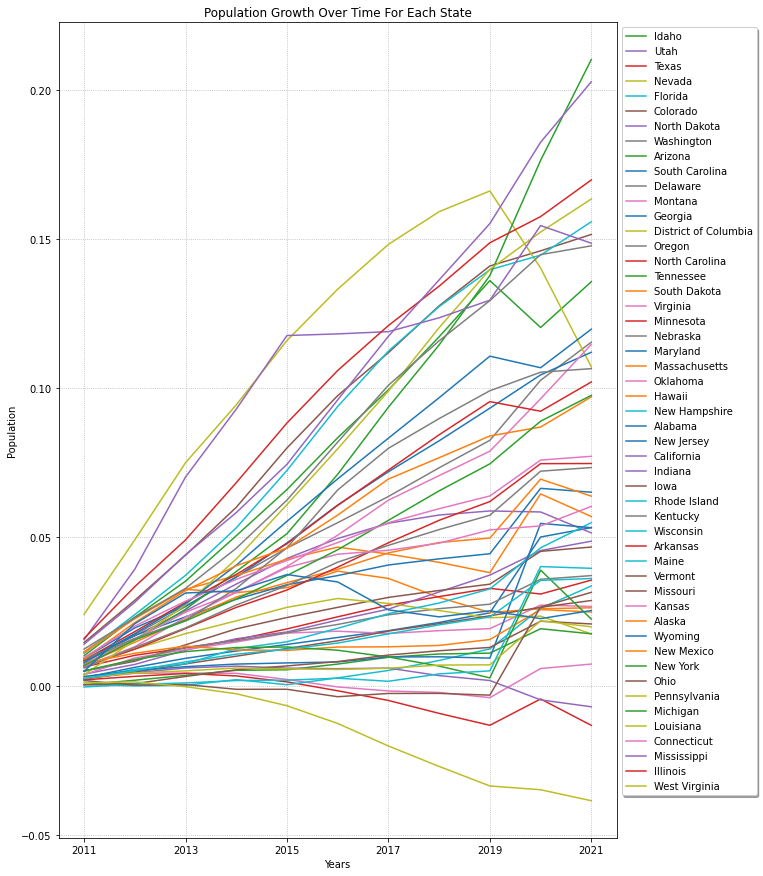

In [ ]:
per_population_growth = total_population.copy()
years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
for i in range(len(years)):
    per_population_growth[str(years[len(years) - i - 1])] = total_population[str(years[len(years)- i- 1])]/total_population['2010']-1

per_population_growth.drop(['2010'],inplace=True,axis=1)
per_population_growth.set_index('Geographic Area').transpose().plot(figsize=(10,15))
plt.legend()
#plt.yscale("log")
plt.xlabel("Years")
plt.ylabel("Population")
plt.title("Population Growth Over Time For Each State")
plt.grid(linestyle=':')

handles, labels = plt.gca().get_legend_handles_labels()
order = per_population_growth['2021'].sort_values(ascending=False).keys()
order = order-6

plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],bbox_to_anchor=(1., 1.0), fancybox=True, shadow=True, ncol=1)


**Percent Population Growth by State**

Above is the percentage of population growth of each state based on its initial population in 2010. Each state starts on the value 1 for the year 2010, so 2010 was not included. The legend is sorted by the max value at the end, so it's easier to compare each state's line, and also see which state proportionally grew the most over the decade. This is important because the population growth of a state will affect the number of protests and the number of radicalized individuals, and therefore the number of protests per radicalized individual.

In [ ]:
pd.pivot_table(total_population, index='Geographic Area').head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Geographic Area,,,,,,,,,,,,
Alabama,4785437.0,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0,5024803.0,5039877.0
Alaska,713910.0,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0,732441.0,732673.0
Arizona,6407172.0,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0,7177986.0,7276316.0
Arkansas,2921964.0,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0,3012232.0,3025891.0
California,37319502.0,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0,39499738.0,39237836.0


<h1>Merging Data</h1><p>Both protest and radicalization measure resistance to social or governmental structures. Therefore, it makes sense to join aspects of the data into a very simple table to compare radicalization and protest activity. We will not merge this data on the 'State' attribute, because both datasets have such a large number of variables that the table produced would be unweildy.</p>

In [ ]:
resistance_data = pd.DataFrame()
resistance_data['Radicalized_num'] = pirus_states_since_2000
resistance_data['Protest_num'] = protests_by_state
resistance_data.head()

,Radicalized_num,Protest_num
Loc_Habitation_State1,,
California,137,4439.0
New York,108,2688.0
Texas,84,1649.0
Florida,83,1823.0
Minnesota,70,747.0


<p>We can look at the relationship now between the number of protests in a state and the number of radicalized individuals in a state. Unsurprisingly, there is a visually obvious correlation. 

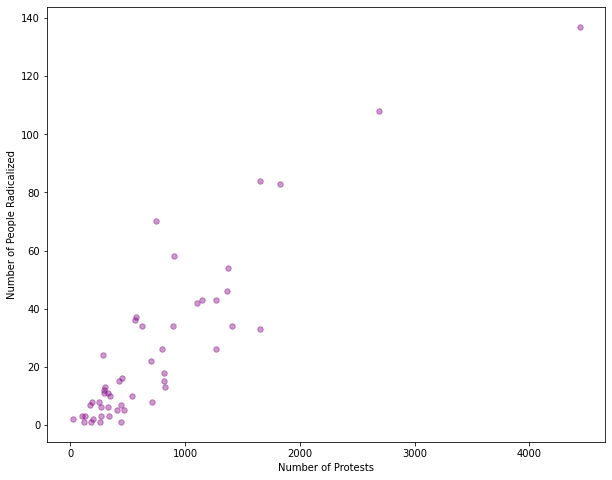

In [ ]:
resistance_data.rename({'Loc_Habitation_State1':'State'},inplace=True)
resistance_data.plot(kind='scatter',
                     y='Radicalized_num',
                     x='Protest_num',
                     ylabel = "Number of People Radicalized",
                     xlabel = "Number of Protests",
                     figsize=(10,8),
                     alpha=0.4,
                     color='purple',
                     s=30)

<p>We can compute the correlation between these two variables as follows:</p>

In [ ]:
resistance_data['Protest_num'].corr(resistance_data['Radicalized_num'])

0.8996117793328046

<p>This is a significant, but unsurprising 
correlation. We can represent the population size of the state through the dot size. </p>

In [ ]:
resistance_data_merged = resistance_data.reset_index().rename(columns={'Loc_Habitation_State1':'State'}).merge(total_population.rename(columns={'Geographic Area':'State',"2021":"Population"})[["State","Population"]],on='State', how="right").set_index("State")
resistance_data_merged.head()

,Radicalized_num,Protest_num,Population
State,,,
Alabama,24.0,281.0,5039877.0
Alaska,8.0,252.0,732673.0
Arizona,36.0,563.0,7276316.0
Arkansas,7.0,174.0,3025891.0
California,137.0,4439.0,39237836.0


In [ ]:
resistance_data_merged["Population"]

State
Alabama                  5039877.0
Alaska                    732673.0
Arizona                  7276316.0
Arkansas                 3025891.0
California              39237836.0
Colorado                 5812069.0
Connecticut              3605597.0
Delaware                 1003384.0
District of Columbia      670050.0
Florida                 21781128.0
Georgia                 10799566.0
Hawaii                   1441553.0
Idaho                    1900923.0
Illinois                12671469.0
Indiana                  6805985.0
Iowa                     3193079.0
Kansas                   2934582.0
Kentucky                 4509394.0
Louisiana                4624047.0
Maine                    1372247.0
Maryland                 6165129.0
Massachusetts            6984723.0
Michigan                10050811.0
Minnesota                5707390.0
Mississippi              2949965.0
Missouri                 6168187.0
Montana                  1104271.0
Nebraska                 1963692.0
Nevada        

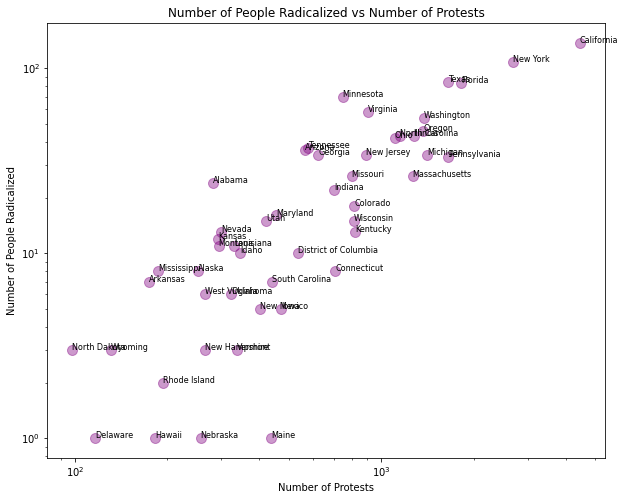

In [ ]:
resistance_data_merged.plot(kind='scatter',
                     y='Radicalized_num',
                     x='Protest_num',
                     ylabel = "Number of People Radicalized",
                     xlabel = "Number of Protests",
                     title="Number of People Radicalized vs Number of Protests",
                     figsize=(10,8),
                     alpha=0.4,
                     color='purple',
                     #s = resistance_data_merged['Population']
                     #s=resistance_data_merged["Population"].apply({lambda x: x/1e4}),
                     s=100)
plt.xscale("log")
plt.yscale("log")
x_vals = list(resistance_data_merged.reset_index()["Protest_num"])
y_vals = list(resistance_data_merged.reset_index()["Radicalized_num"])
states = list(resistance_data_merged.reset_index()["State"])
for i in range(len(x_vals)):
    plt.text(x_vals[i], y_vals[i], states[i], fontsize=8)


<h3>Protests and Radicalized Individuals Based On State</h3>
<p>It is unsurprising to see the largest states have both the most radicalized individuals as well as protests, so a better perspective would be to normalize each of those values based on population. Below will give a better view on each state's participation in politics</p>

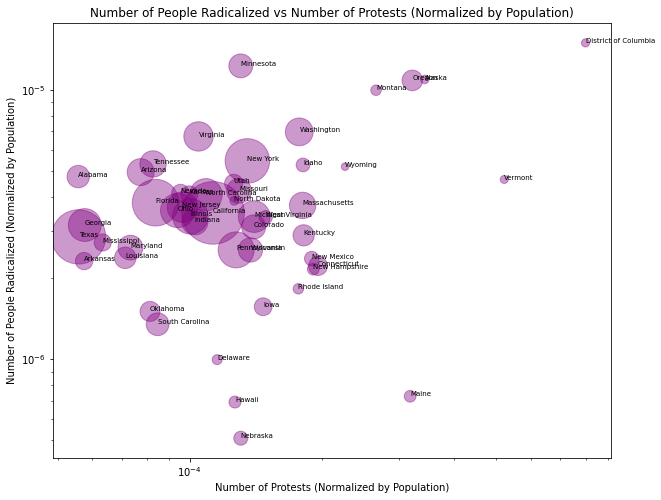

In [ ]:
resistance_data_normalized = resistance_data_merged.copy()
resistance_data_normalized["Protest_num"] = resistance_data_normalized["Protest_num"]/resistance_data_normalized["Population"]
resistance_data_normalized["Radicalized_num"] = resistance_data_normalized["Radicalized_num"]/resistance_data_normalized["Population"]
resistance_data_normalized.plot(kind='scatter',
                     y='Radicalized_num',
                     x='Protest_num',
                     ylabel = "Number of People Radicalized (Normalized by Population)",
                     xlabel = "Number of Protests (Normalized by Population)",
                     title="Number of People Radicalized vs Number of Protests (Normalized by Population)",
                     figsize=(10,8),
                     alpha=0.4,
                     color='purple',
                     #s = resistance_data_merged['Population']
                     s=resistance_data_normalized["Population"].apply({lambda x: x/1e4}))
plt.xscale("log")
plt.yscale("log")
x_vals = list(resistance_data_normalized.reset_index()["Protest_num"])
y_vals = list(resistance_data_normalized.reset_index()["Radicalized_num"])

for i in range(len(x_vals)):
    plt.text(x=x_vals[i], y=y_vals[i], s=states[i], fontsize=7)

<h3>Normalized Protests and Radicalized Individuals</h3>
<p>One flaw with the graph above was that it meant nothing. When comparing large sets of data belonging to different areas, it's important to normalize them by some factor, so that the data is proportional instead of its regular value. After normalizing the data, a very interesting but telling picture shows. DC is in the top right, making it the most participatory "state" in the United States. This makes sense because it's home to the White House, and many protests likely occur here by others outside of DC. The number of protests in proportion to its population as just a city make it key for political involvement.</p>

<h1>Models</h1>

<h3>Model 1: Preface</h3><p>The Protest data Attendance column is missing values for many events. We will build a model to predict what the attendance would have been based on the issues the protest addressed, the state protest took place in, and the proportion of the radicalized individuals from that state.<p>First, let's look at what issues people protest about most often.

In [ ]:
count = []
final = []
for tag in protests_temp['Tags']:
    temp = tag.split(';')
    count.append(len(temp))
    final += temp
final = pd.unique(final)
print(pd.unique(count))

[3 2 4 6 7 5 8]


In [ ]:
protests_temp.head()

,Date,Location,Attendees,Event (legacy; see tags),Tags,Curated,Source,Total_Articles,State
0,2017-01-16,"Johnson City, TN",300.0,Civil Rights,Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.johnsoncitypress.com/Local/2017/01/...,4,Tennessee
1,2017-01-16,"Indianapolis, IN",20.0,Environment,Environment; For wilderness preservation,Yes,http://wishtv.com/2017/01/16/nature-groups-pro...,1,Indiana
2,2017-01-16,"Cincinnati, OH",NaN,Other (Martin Luther King Jr.),Civil Rights; For racial justice; Martin Luthe...,Yes,http://www.cincinnati.com/picture-gallery/news...,1,Ohio
3,2017-01-18,"Hartford, CT",300.0,Healthcare (Pro-Planned Parenthood),Healthcare; For Planned Parenthood,Yes,http://www.realhartford.org/2017/01/19/reprodu...,1,Connecticut
4,2017-01-19,"Washington, DC",NaN,Executive,Executive; Against 45th president,Yes,https://malvern-online.com/content/melee-near-...,1,District of Columbia


In [ ]:
protests_iss =protests_temp[['Date','Location','Event (legacy; see tags)', 'Attendees','State','Tags']]
protests_iss_known = protests_iss

In [ ]:
l_tags = []
for i in range(1,9):
    m ='Tag' + str(i)
    l_tags.append(m)

In [ ]:
protests_iss_known.rename(columns={'Event (legacy; see tags)':'Event'},inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
def categorizer(word):
    p_list = [r"\s*([Rr]acial)",
    r'\s*(45)', r"\s*([Gg]un\s[Rr]ights)",r"\s*([Gg]un\s[Cc]ontrol)",
     r"\s*([Oo]ther)", r"\s*([Ee]nvironment)", 
     r"\s*([Ee]ducation)",r'\s*([Hh]ealthcare)',
     r"\s*([Ii]mmigration)",r"\s*([Ee]xecutive)", 
     r"\s*([Ii]nternational\s[Rr]elations)",
     r"\s*([Ll]egislative)",r"\s*([Cc]ivil\s[Rr]ights)"]
    tag_dict = {r"\s*([Rr]acial)":"Racial",
    r'\s*(45)':"45th President", r"\s*([Gg]un\s[Rr]ights)":"Gun Rights",r"\s*([Gg]un\s[Cc]ontrol)":"Gun Control",
     r"\s*([Oo]ther)":'Other', r"\s*([Ee]nvironment)":'Environment', 
     r"\s*([Ee]ducation)":"Education",r'\s*([Hh]ealthcare)':'Healthcare',
     r"\s*([Ii]mmigration)":'Immigration',r"\s*([Ee]xecutive)":'Executive', 
     r"\s*([Ii]nternational\s[Rr]elations)":'International Relations',
     r"\s*([Ll]egislative)":'Legislative',r"\s*([Cc]ivil\s[Rr]ights)":'Civil Rights','[]':'Other'}
    ret_list = set([])
    for w in word.split(';'):
        print(w)
        for pattern in p_list:
            m = re.search(pattern,w)
            if m != None:
                b = tag_dict[pattern]
                if b not in ret_list:
                    ret_list.add(b)
    return ret_list

In [ ]:
events = []
for a in protests_iss_known["Tags"]:
    events.append(categorizer(a))
#eventsssss = protests_iss_known["Tags"].apply({lambda x: categorizer(x)}) # "Racial Injustice" if "Racial Injustice" in x else "Gun Rights" if "Guns" in x else "Other" if "Other" in x else "Environment" if "Environment" in x else "Education" if "Education" in x else "Immigration" if "Immigration" in x else x
protests_iss_known["Event"] = events
Common_Events = protests_iss_known["Event"].value_counts().head(12).keys()
print(len(protests_iss_known["Event"].value_counts()))
#protests_iss_known["Event"] = protests_iss_known["Event"].apply({lambda x: x if x in Common_Events else "Other"})

Streaming output truncated to the last 5000 lines.
Other
 For homeless residents
Education
 Against budget
Education
 Against police presence
Civil Rights
 For racial justice
 For greater accountability
 Police
Collective Bargaining
 For better compensation
Collective Bargaining
 For unionization
 Against layoffs
Education
 Against pandemic intervention
 Coronavirus
Other
 Against eviction
 Coronavirus
Other
 For supporting police
Civil Rights
 For racial justice
 For greater accountability
 Counter protest
 Police
Healthcare
 Against pandemic intervention
 Coronavirus
Other
 Against bullying
Civil Rights
 For racial justice
 For greater accountability
 Police
Education
 Against pandemic intervention
 Coronavirus
Civil Rights
 For racial justice
 For greater accountability
 Police
Other
 Against violence
Healthcare
 For status quo
 Insurance
Executive
 Against candidate
Civil Rights
 For transgender rights
Education
 Against police presence
Environment
 Against tree removal
Healthcare


<ipython-input-45-3a64f7bf62eb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  protests_iss_known["Event"] = events


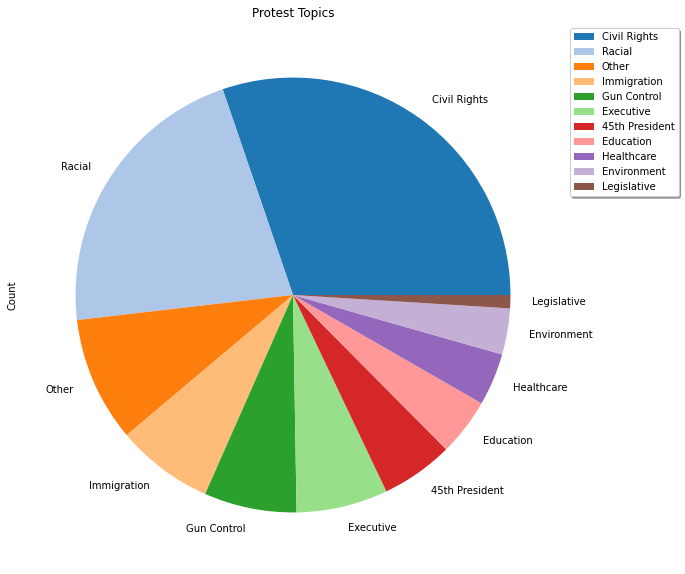

In [ ]:
def overlapping_value_count(df,return_dict):
    s = df['Event']
    for entry in s:
        l = list(entry)
        for e in l:
            if e in return_dict.keys():
                return_dict[e] += 1
            else:
                return_dict[e] = 1
    ret_val = pd.DataFrame(list(return_dict.items()),index=range(0,len(return_dict.keys())))
    ret_val.columns = ['Tag','Count']
    ret_val.set_index('Tag',inplace=True)
    return ret_val
tag_counts = overlapping_value_count(protests_iss_known,{})
tag_counts.sort_values("Count", ascending=False).plot(y='Count',kind='pie',figsize=(10,10),fontsize=10,legend=True,title='Protest Topics',colors=sns.color_palette('tab20'))
plt.legend(bbox_to_anchor=(1., 1.0), fancybox=True, shadow=True, ncol=1)

<p>People protest many different issues. Let's look at the top 50.</p>

In [ ]:
#How to select out certain Protest issues, when Event attribute is saved to a list:
"""'Racial' in protests_iss_known.iloc[0].Event
protests_iss_known[protests_iss_known['Event']&{'Racial'}]"""

"'Racial' in protests_iss_known.iloc[0].Event\nprotests_iss_known[protests_iss_known['Event']&{'Racial'}]"

<p>Just from looking at this chart, it looks like civil rights, racial justice, guns, and immigration are major issues that people protest about..</p><p>Let's also look at the relationship between the time of year that the protests occur and the number of attendees. We will have to drop rows that do not have attendees listed, and convert the data column to a datetime object. 

In [ ]:
protests_iss_known.Date = pd.to_datetime(protests_iss_known.Date)
protests_real_test = protests_iss.query('Attendees != Attendees')
protests_iss_attendees_known = protests_iss.dropna(subset=['Attendees'])

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


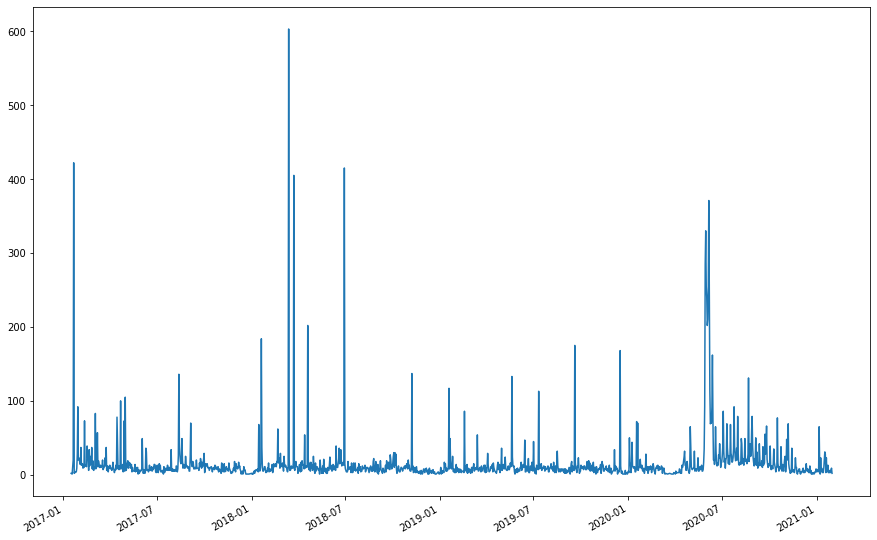

In [ ]:
protests_iss_attendees_known.Date.value_counts().plot(figsize=(15,10))

In [ ]:
protests_real_test

,Date,Location,Event,Attendees,State,Tags
2,2017-01-16,"Cincinnati, OH","{Racial, Civil Rights}",NaN,Ohio,Civil Rights; For racial justice; Martin Luthe...
4,2017-01-19,"Washington, DC","{45th President, Executive}",NaN,District of Columbia,Executive; Against 45th president
5,2017-01-19,"Washington, DC","{45th President, Executive}",NaN,District of Columbia,Executive; For 45th president; Counter protest
6,2017-01-20,"University of Washington, Seattle, WA","{Racial, Civil Rights}",NaN,Washington,Civil Rights; For racial justice; Against invi...
23,2017-01-20,"Napa, CA","{45th President, Executive}",NaN,California,Executive; Against 45th president
...,...,...,...,...,...,...
38082,2021-01-30,"Portage Lake Lift Bridge, Hancock, MI",{Healthcare},NaN,Michigan,Healthcare; Against pandemic intervention; Spo...
38083,2021-01-30,"Decatur, GA",{Education},NaN,Georgia,Education; Against hazardous conditions; Coron...
38090,2021-01-30,"Grant Beach Park, Springfield, MO",{Other},NaN,Missouri,Other; Against eviction; Coronavirus
38092,2021-01-31,"Topeka, KS",{Civil Rights},NaN,Kansas,Civil Rights; For abortion rights


<h3>Model 1: Building the Model</h1><p>We previously saved the protests with unknown attendees to the DataFrame protests_real_test. Let's revisit that data.</p>

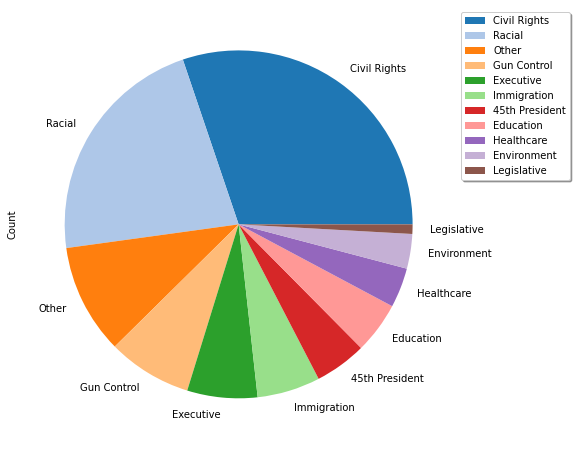

In [ ]:
tag_unknown = overlapping_value_count(protests_real_test,{})
tag_unknown.sort_values("Count", ascending=False).plot(y='Count',kind='pie',figsize=(8,8),colors=sns.color_palette('tab20'))
plt.legend(bbox_to_anchor=(1., 1.0), fancybox=True, shadow=True, ncol=1)


<p>We can build a K-nearest neighbor predictor of the number of Attendees at a protest based on the issues the protest addressed, the state protest took place in, and the proportion of the radicalized individuals from that state</p>

In [ ]:
protests_iss_known

,Date,Location,Event,Attendees,State,Tags
0,2017-01-16,"Johnson City, TN","{Racial, Civil Rights}",300.0,Tennessee,Civil Rights; For racial justice; Martin Luthe...
1,2017-01-16,"Indianapolis, IN",{Environment},20.0,Indiana,Environment; For wilderness preservation
2,2017-01-16,"Cincinnati, OH","{Racial, Civil Rights}",NaN,Ohio,Civil Rights; For racial justice; Martin Luthe...
3,2017-01-18,"Hartford, CT",{Healthcare},300.0,Connecticut,Healthcare; For Planned Parenthood
4,2017-01-19,"Washington, DC","{45th President, Executive}",NaN,District of Columbia,Executive; Against 45th president
...,...,...,...,...,...,...
38091,2021-01-30,"Washington Square, Ottawa, IL","{Legislative, 45th President}",100.0,Illinois,Legislative; Against congressional representat...
38092,2021-01-31,"Topeka, KS",{Civil Rights},NaN,Kansas,Civil Rights; For abortion rights
38093,2021-01-31,"Austin, TX",{Other},20.0,Texas,Other; Against homeless residents
38094,2021-01-31,"Salt Lake City, UT",{Other},NaN,Utah,Other; Against deregulation; Business


In [ ]:
pirus_temp.Date_Exposure = pd.to_datetime(pirus_temp.Date_Exposure)
type(pirus_temp.iloc[0].Date_Exposure)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
#How to select out certain Protest issues, when Event attribute is saved to a list:
def issue_search(issue):
    return protests_iss_known[protests_iss_known['Event']&{issue}]
def state_date(row):
    return (row.Date,row.State)
def state_year(row):
    return (row.Date.year,row.State)
def vote_pcnt(tuple):
    #print('tuple',tuple)
    year = tuple[0]
    state = tuple[1]
    if year%2 != 0:
        year -= 1
        #print(year)
    if state not in pd.unique(csv_final.Region):
        return (np.nan)
    line = str(csv_final[(csv_final.Region == state)&(csv_final.Year == year)]['VEP Highest Office'])
    #print(line)
    pcnt = re.search(r'(....%)',line)
    #print(pcnt.groups())
    return float(pcnt[0][:-1])
def get_rads_by_population(tuple):
    date = tuple[0]
    state = tuple[1]
    if state not in pd.unique(total_population['Geographic Area']):
        return ('NaN')
    radicals = pd.DataFrame(pirus_temp[(pirus_temp.Date_Exposure < pd.to_datetime(date))&(pirus_temp.Loc_Plot_State1 == state)&(pirus_temp.Date_Exposure > pd.to_datetime('2000-01-01 00:00:00'))]).size
    population = total_population[total_population['Geographic Area'] == state][str(date.year)]
    return list(population/radicals)[0]
def to_raw(string):
    return fr"{string}"



In [ ]:
votes = ['NaN']*38096
rads = [0]*38096
for e in range(0,38096):
    pcnt = vote_pcnt(state_year(protests_iss_known.iloc[e]))
    votes[e] = pcnt
    var1 = state_date(protests_iss_known.iloc[e])
    rad = get_rads_by_population(var1)
    rads[e]=rad
protests_iss_known['State_voters'] = votes
protests_iss_known['Radicals'] = rads

all_tags= ['Racial','45th President', 'Gun Rights', 'Gun Control', 'Other', 'Environment', 'Education', 'Healthcare', 'Immigration', 'Executive', 'International Relations', 'Legislative', 'Civil Rights', 'Other']
for t in all_tags:
    protests_iss_known[t] = [0]*38096
    for e in list(issue_search(t).index):
        e = int(e)
        protests_iss_known.loc[e,t]=1

<ipython-input-55-cb401287bac3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  protests_iss_known['State_voters'] = votes
<ipython-input-55-cb401287bac3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  protests_iss_known['Radicals'] = rads


In [ ]:
protests_iss_known.loc[protests_iss_known.Radicals == inf,'Radicals'] = 0
protests_iss_known.loc[protests_iss_known.Radicals == pd.NA,'Radicals'] = np.nan

In [ ]:
protests_real_test = protests_iss_known[protests_iss_known.Attendees.isnull()]
protests_real_test = protests_real_test.dropna(subset =['Radicals'])
protests_real_test = protests_real_test.dropna(subset =['State_voters'])
protests_iss_attendees_known = protests_iss_known.dropna(subset=['Attendees'])
protests_iss_attendees_known = protests_iss_attendees_known.dropna(subset=['State_voters'])
protests_iss_attendees_known = protests_iss_attendees_known.dropna(subset=['Radicals'])
protests_iss_attendees_known = protests_iss_attendees_known.dropna(subset=['Radicals'])

In [ ]:
protests_iss_attendees_known.Radicals = protests_iss_attendees_known.Radicals.astype('int')
protests_iss_attendees_known.Attendees = protests_iss_attendees_known.Attendees.astype('int')

In [86]:
protests_iss_attendees_known.columns

Index(['Date', 'Location', 'Event', 'Attendees', 'State', 'Tags',
       'State_voters', 'Radicals', 'Racial', '45th President', 'Gun Rights',
       'Gun Control', 'Other', 'Environment', 'Education', 'Healthcare',
       'Immigration', 'Executive', 'International Relations', 'Legislative',
       'Civil Rights'],
      dtype='object')

In [88]:
from sklearn.metrics import accuracy_score
protests_iss_attendees_known.Date = protests_iss_attendees_known.Date.astype('int')
feats = ['Date','State','State_voters', 'Racial', '45th President', 'Gun Rights', 'Gun Control',
       'Other', 'Environment', 'Education', 'Healthcare', 'Immigration',
       'Executive', 'International Relations', 'Legislative', 'Civil Rights',
       'Radicals']
X_dict = protests_iss_attendees_known[feats].to_dict(orient="records")
X_train = vec.transform(X_dict)
y = protests_iss_attendees_known["Attendees"]

# specify the pipeline
kays = []
accuracy = []
cvs = []
vec = DictVectorizer(sparse=False)
scaler = StandardScaler()
for num in range(1,30,2):
  model = KNeighborsRegressor(n_neighbors=num)
  pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])
  scores = cross_val_score(pipeline, X_dict, y, 
                         cv=10, scoring='neg_root_mean_squared_error')
  i = 1
  for ef1 in scores:
    accuracy.append(ef1)
    kays.append(num)
    cvs.append(i)
    i+=1

for_plot = pd.DataFrame()
for_plot['K-value'] = kays
for_plot['Division'] = cvs
for_plot['F1'] = accuracy

print(for_plot)


     K-value  Division            F1
0          1         1 -22346.074153
1          1         2  -5973.737772
2          1         3 -15891.491318
3          1         4  -9205.307158
4          1         5  -8565.409282
..       ...       ...           ...
145       29         6  -5521.651399
146       29         7  -2329.276918
147       29         8  -2166.592504
148       29         9   -564.024724
149       29        10   -812.297036

[150 rows x 3 columns]


In [102]:
for_plot['F1'] = accuracy
for_plot.rename(columns={'F1':'RMSE'},inplace=True)
for_plot['Class'] = 'Train'

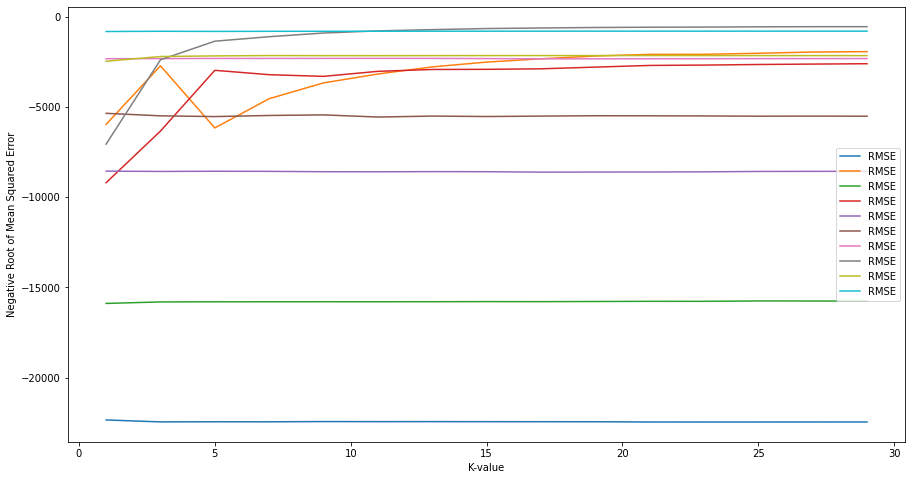

In [90]:
plt1 = for_plot[for_plot.Division == 1].plot(x='K-value',y='RMSE',figsize=(15,8),ylabel='Negative Root of Mean Squared Error')
plt2 = for_plot[for_plot.Division == 2].plot(x='K-value',y='RMSE',ax=plt1)
plt3 = for_plot[for_plot.Division == 3].plot(x='K-value',y='RMSE',ax=plt1)
plt4 = for_plot[for_plot.Division == 4].plot(x='K-value',y='RMSE',ax=plt1)
plt5 = for_plot[for_plot.Division == 5].plot(x='K-value',y='RMSE',ax=plt1)
plt6 = for_plot[for_plot.Division == 6].plot(x='K-value',y='RMSE',ax=plt1)
plt7 = for_plot[for_plot.Division == 7].plot(x='K-value',y='RMSE',ax=plt1)
plt9 = for_plot[for_plot.Division == 9].plot(x='K-value',y='RMSE',ax=plt1)
plt8 = for_plot[for_plot.Division == 8].plot(x='K-value',y='RMSE',ax=plt1)
plt10 = for_plot[for_plot.Division == 10].plot(x='K-value',y='RMSE',ax=plt1)


In [92]:
protests_iss_attendees_known.Date = pd.to_datetime(protests_iss_attendees_known.Date)

<h3>Model 2</h3><p>Radicalization and Protests Over Time: We will look at the correlation between radicalized individuals and protests over time. Perhaps there are relationships between radicalization on certain issues and more protests on certain issues. For example, we know that internet searches for "Straight pride" peak each year during June, which is Pride Month for LGBTQ+ folks. (https://trends.google.com/trends/explore?date=all&geo=US&q=straight%20pride) Perhaps more discussion around an issue in the form of protests causes more radicalization on the opposing side. We will use time data and issue categories for both radicalized individuals from the PIRUS data and protest events.</p><p>As an exploratory exercise, let's plot both the PIRUS and the protests data over time to see the spikes in activity.</p>

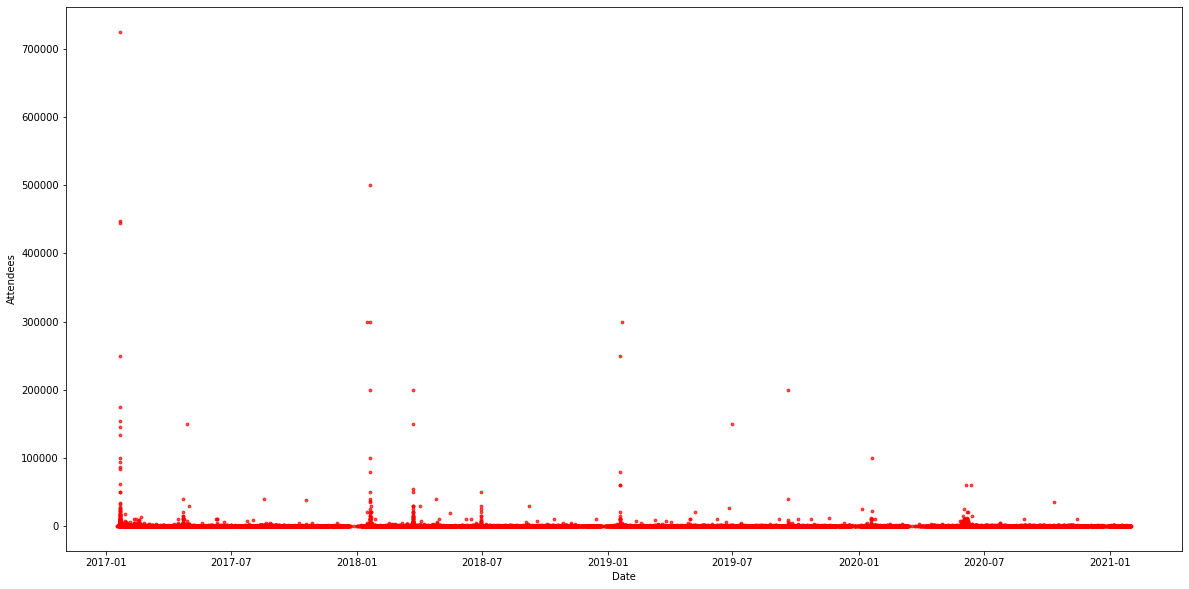

In [101]:
protests_iss_attendees_known.plot(kind='scatter',x='Date',y='Attendees',figsize=(20,10),s=8,c='red',alpha=0.7)

<p>we see clear spikes in protest participation and protest size.</p>

Scaling to only include value up to 10,000.

In [109]:
pd.unique(protests_iss_attendees_known.Attendees)

array([   300,     20,    100,   2450,   1200,    500,   1000,    200,
          120,     50,     40,   2000,    150,     75, 725000, 447500,
       445000, 250000, 175000, 154000, 145000, 133750, 100000,  94500,
        86250,  83500,  61350,  50550,  50000,  34500,  31750,  28100,
        26000,  25000,  24500,  22250,  21434,  20000,  18350,  17900,
        17250,  16750,  15800,  15000,  14700,  14500,  13150,  11150,
        11000,  10600,  10000,   9250,   8950,   8900,   8625,   8400,
         8350,   8150,   7900,   7600,   7250,   7000,   6900,   6700,
         6350,   6150,   6000,   5900,   5700,   5672,   5450,   5360,
         5250,   5000,   4900,   4725,   4350,   4000,   3900,   3725,
         3675,   3625,   3450,   3350,   3300,   3225,   3175,   3075,
         3000,   2900,   2725,   2721,   2662,   2635,   2500,   2440,
         2360,   2285,   2800,   2180,   2175,   1900,   1815,   1785,
         1725,   1675,   1600,   1590,   1560,   1500,   1450,   1435,
      

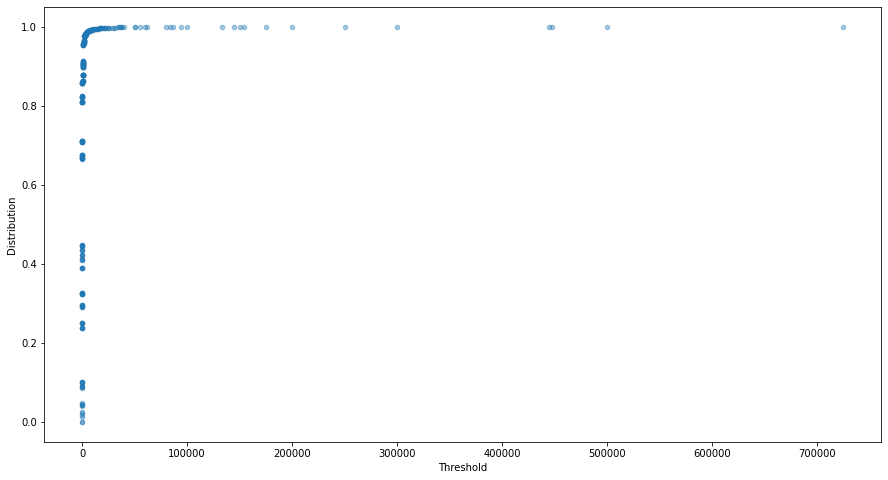

In [116]:
percentile = []
threshold = []
for num in pd.unique(protests_iss_attendees_known.Attendees):
  percentile.append(protests_iss_attendees_known[protests_iss_attendees_known.Attendees < num].size/protests_iss_attendees_known.size)
  threshold.append(num)
eval = pd.DataFrame()
eval['Distribution'] = percentile
eval['Threshold'] = threshold
eval.plot(kind='scatter',x='Threshold',y='Distribution',figsize = (15,8),alpha=0.4)

data skewed as shit

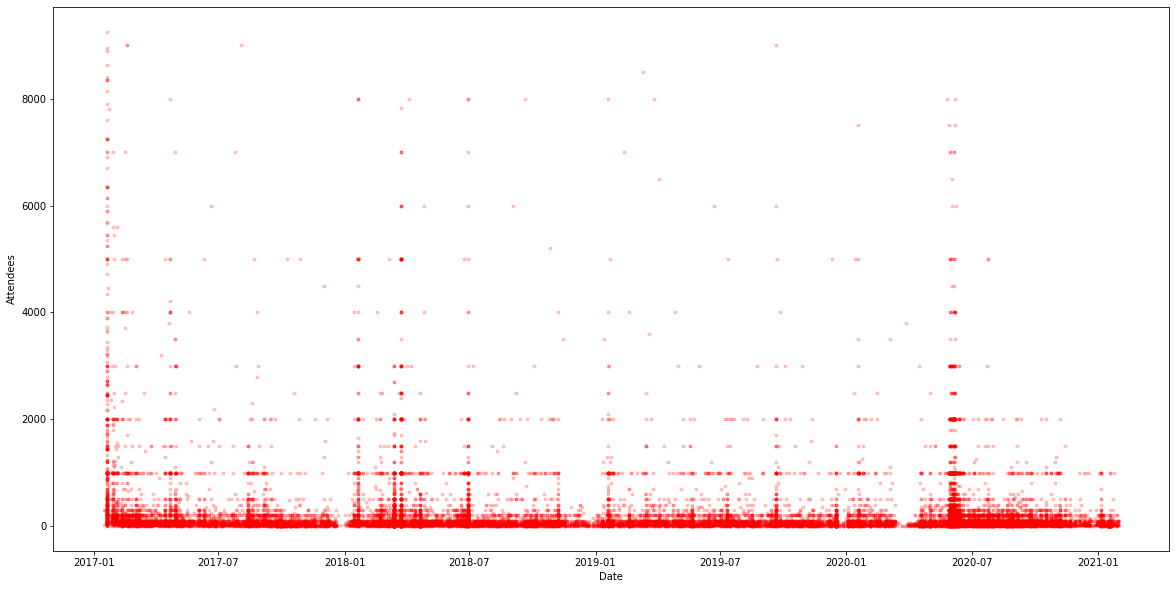

In [99]:
protests_iss_attendees_known[protests_iss_attendees_known.Attendees < 10000].plot(kind='scatter',x='Date',y='Attendees',figsize=(20,10),s=8,c='red',alpha=0.2)

In [ ]:
pirus_temp.Date_Exposure = pd.to_datetime(pirus_temp.Date_Exposure)


/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
pirus_temp

,Subject_ID,Loc_Plot_State1,Loc_Plot_City1,Loc_Plot_State2,Loc_Plot_City2,Date_Exposure,Plot_Target1,Plot_Target2,Plot_Target3,Attack_Preparation,...,Previous_Criminal_Activity_Type3,Previous_Criminal_Activity_Age,Gang,Gang_Age_Joined,Trauma,Other_Ideologies,Angry_US,Group_Grievance,Standing,Year
882,3005,-99,-99,NaN,NaN,2000-01-01,-88,NaN,NaN,-88,...,NaN,-88,0,-88,-99,0,1,-99,-99,0
883,3655,Montana,-99,NaN,NaN,2000-01-01,-88,NaN,NaN,-88,...,NaN,-99,0,-88,-99,0,-99,-99,-99,0
884,4148,California,Los Angeles,NaN,NaN,2000-01-11,-88,NaN,NaN,-88,...,NaN,-88,0,-88,-99,0,-99,-99,-99,0
885,4127,District of Columbia,Washington,NaN,NaN,2000-01-12,-88,NaN,NaN,-88,...,NaN,-88,0,-88,0,0,0,0,1,0
886,3709,Indiana,-99,NaN,NaN,2000-02-01,-88,NaN,NaN,-88,...,NaN,-88,0,-88,-99,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,7817,Florida,Tallahassee,NaN,NaN,2018-11-03,14,NaN,NaN,1,...,NaN,-88,0,-88,1,0,0,3,1,18
2221,7828,South Carolina,Columbia,NaN,NaN,2018-11-12,-88,NaN,NaN,-88,...,NaN,-99,0,-88,-99,0,-99,-99,-99,18
2222,7825,District of Columbia,Washington,NaN,NaN,2018-11-13,-88,NaN,NaN,-88,...,NaN,2,0,-88,1,0,0,3,0,18
2223,1374,California,Los Angeles,NaN,NaN,2018-11-26,14,NaN,NaN,1,...,NaN,-99,0,-88,-99,0,-99,-99,-99,18


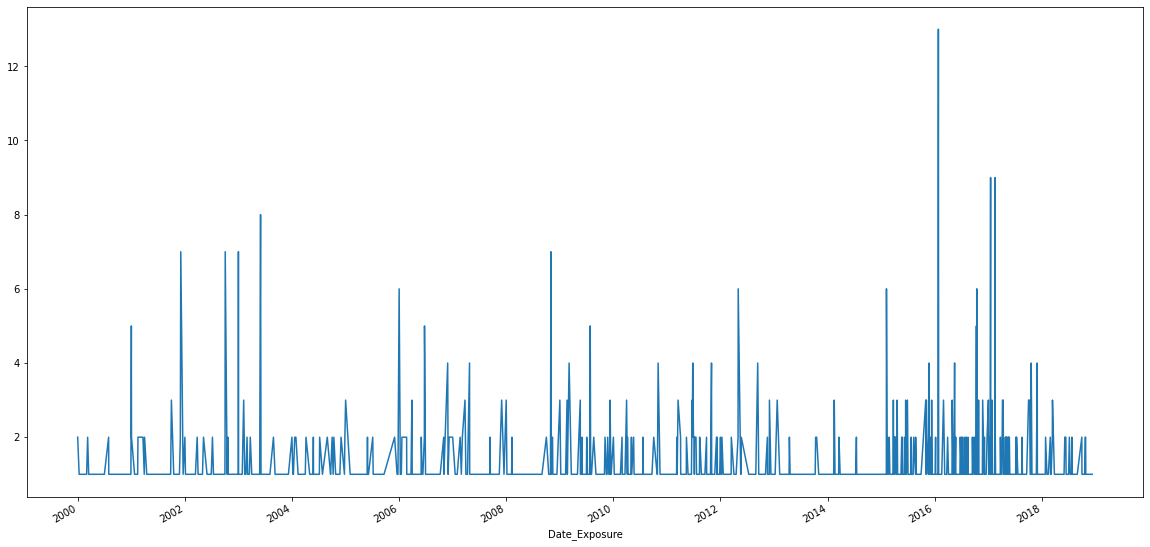

In [ ]:
pirus_temp.set_index('Date_Exposure')
rad_counts = pirus_temp.sort_index().value_counts('Date_Exposure',sort=False)
rad_counts.plot(x='Date_Exposure',figsize=(20,10))

#rad_counts.plot(x='Date_Exposure', y = '0')

<p>Now we can plot protests and radicalization on the same axis, though our protest data only starts at 2017. We will have to filter the radicalization data.</p>

In [ ]:
pirus_temp.Year = pd.to_numeric(pirus_temp.Year)
since_17 = pirus_temp.loc[pirus_temp.Year>=17]
since_17.set_index('Date_Exposure')

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Subject_ID,Loc_Plot_State1,Loc_Plot_City1,Loc_Plot_State2,Loc_Plot_City2,Plot_Target1,Plot_Target2,Plot_Target3,Attack_Preparation,Op_Security,...,Previous_Criminal_Activity_Type3,Previous_Criminal_Activity_Age,Gang,Gang_Age_Joined,Trauma,Other_Ideologies,Angry_US,Group_Grievance,Standing,Year
Date_Exposure,,,,,,,,,,,,,,,,,,,,,
2017-01-01,6610,California,Los Molinos,Oregon,NaN,-88,NaN,NaN,-88,-88,...,NaN,-88,0,-88,0,0,0,0,0,17
2017-01-01,6734,Minnesota,Minneapolis,NaN,NaN,-88,NaN,NaN,-88,-88,...,NaN,-99,0,-88,-99,0,1,2,0,17
2017-01-01,6735,Minnesota,Minneapolis,NaN,NaN,-88,NaN,NaN,-88,-88,...,NaN,-88,0,-88,-99,0,0,0,0,17
2017-01-03,6596,Michigan,Kentwood,Michigan,Grand Rapids,15,NaN,NaN,1,0,...,NaN,-88,0,-88,-99,0,0,0,-99,17
2017-01-07,6730,Texas,Presido County,NaN,NaN,-88,NaN,NaN,-88,-88,...,NaN,-99,0,-88,-99,0,-99,3,-99,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-03,7817,Florida,Tallahassee,NaN,NaN,14,NaN,NaN,1,1,...,NaN,-88,0,-88,1,0,0,3,1,18
2018-11-12,7828,South Carolina,Columbia,NaN,NaN,-88,NaN,NaN,-88,-88,...,NaN,-99,0,-88,-99,0,-99,-99,-99,18
2018-11-13,7825,District of Columbia,Washington,NaN,NaN,-88,NaN,NaN,-88,-88,...,NaN,2,0,-88,1,0,0,3,0,18


In [ ]:
rad_counts2 = since_17.sort_index().value_counts('Date_Exposure',sort=False)

In [ ]:
rad_counts2 = rad_counts2.reset_index().rename(columns={"Date_Exposure":"Date",0:"freq"})

In [ ]:
merged_data = protests_iss_attendees_known[["Date","Attendees"]].merge(rad_counts2[["Date","freq"]], on='Date', how='inner')
merged_data

,Date,Attendees,freq
0,2017-01-16,300,9
1,2017-01-16,20,9
2,2017-01-20,100,1
3,2017-01-20,2450,1
4,2017-01-20,1200,1
...,...,...,...
2944,2018-12-10,400,1
2945,2018-12-10,100,1
2946,2018-12-10,100,1
2947,2018-12-10,300,1


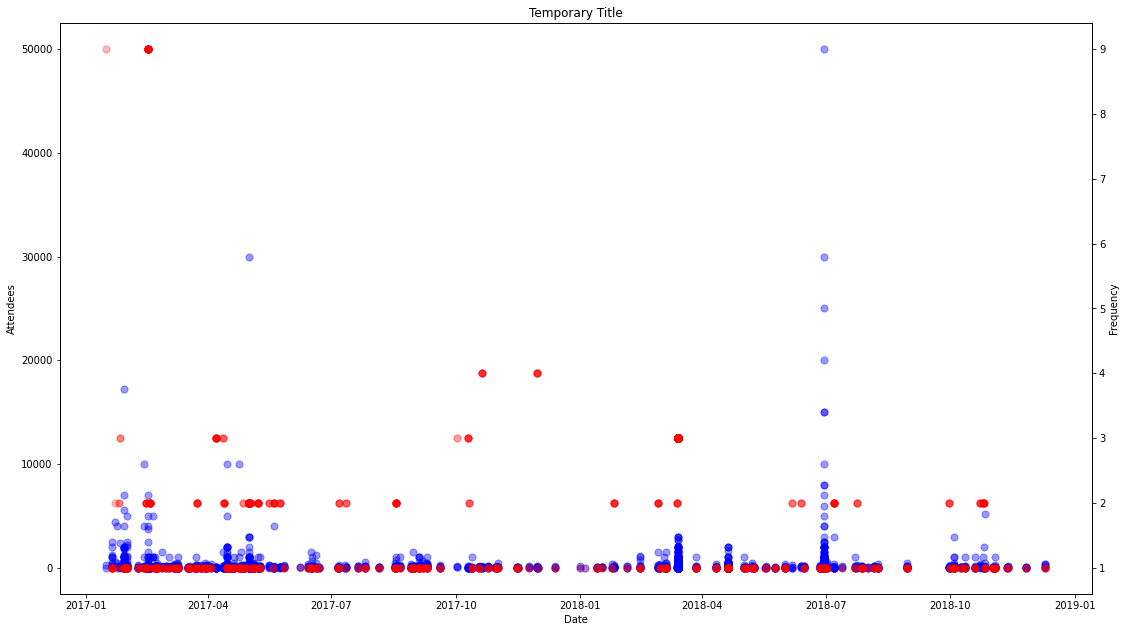

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
fig.set_size_inches(18.5, 10.5)

ax1.scatter(merged_data["Date"], merged_data["Attendees"], c='blue', s=50, alpha=0.4)
ax2.scatter(merged_data["Date"], merged_data["freq"], c='red', s=50, alpha=0.15)
plt.title("Temporary Title") # title this
ax1.set_xlabel("Date")
ax1.set_ylabel("Attendees")
ax2.set_ylabel("Frequency")

plt.show()


<p>This chart shows the relationship between protest attendance/number and the number of individuals radicalized. We will have to code protests by issue and radicalized individuals by issue to get a better idea of the relationships between radicalization and protests.</p>

<h1>Project Strategy</h1><p>Beyond looking at the aggregate state data, the team will look at relationships between political participation, resistance, and violence over time by year for each state. Additionally, if time permits, the group will look at factors such as party affiliation and interest group affiliation.</p>